## DATA ANALYSIS

In [1]:
import pandas as pd
data_frame =   pd.read_csv('data/spotify_features.csv')
data_frame.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [2]:
final_genres = ['Indie','Jazz','Pop','Electronic','Folk','Hip-Hop','Rock','Alternative','Classical','Rap','World','Soul','Blues','R&B','Reggaeton','Reggae','Dance','Country']
data_frame = data_frame[data_frame['genre'].isin(final_genres)]
data_frame.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
135,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.0830,0.724,246333,0.689,0.000000,D,0.3040,-5.922,Minor,0.1350,146.496,4/4,0.6930
136,R&B,Rihanna,Desperado,6KFaHC9G178beAp7P0Vi5S,63,0.3230,0.685,186467,0.610,0.000000,C,0.1020,-5.221,Minor,0.0439,94.384,3/4,0.3230
137,R&B,Yung Bleu,Ice On My Baby (feat. Kevin Gates) - Remix,6muW8cSjJ3rusKJ0vH5olw,62,0.0675,0.762,199520,0.520,0.000004,F,0.1140,-5.237,Minor,0.0959,75.047,4/4,0.0862
138,R&B,Surfaces,Heaven Falls / Fall on Me,7yHqOZfsXYlicyoMt62yC6,61,0.3600,0.563,240597,0.366,0.002430,B,0.0955,-6.896,Minor,0.1210,85.352,4/4,0.7680
139,R&B,Olivia O'Brien,Love Myself,4XzgjxGKqULifVf7mnDIQK,68,0.5960,0.653,213947,0.621,0.000000,B,0.0811,-5.721,Minor,0.0409,100.006,4/4,0.4660


In [13]:
trackids = data_frame['track_id'].unique()

In [20]:
all_genres = data_frame['genre'].unique()

In [14]:
from tqdm import tqdm
columns_to_keep = ['track_id','acousticness','danceability','energy','liveness','loudness','speechiness','tempo','valence']
data = []
for trackid in tqdm(trackids):
    artist = data_frame.artist_name[data_frame['track_id']==trackid].values
    genre = data_frame.genre[data_frame['track_id']==trackid].values
    row = data_frame[data_frame['track_id']==trackid][columns_to_keep].iloc[0].to_dict()
    row['artist_name'] = list(set(artist))
    row['genre'] = list(set(genre))
    data.append(row)

100%|██████████| 120039/120039 [32:45<00:00, 61.08it/s]


In [38]:
dfx = []
for d in data:

    dx = d.copy()
    col = { genre:0 for genre in all_genres }
    for genres in dx['genre']:
        col[genres] = 1
    del dx['genre']
    dx.update(col)
    dfx.append(dx)
# dfx

In [41]:
df = pd.DataFrame(dfx, index=range(len(trackids)))
df.head()

,track_id,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence,artist_name,...,Rap,Indie,Classical,Pop,Reggae,Reggaeton,Jazz,Rock,Soul,World
0,2YegxR5As7BeQuVp2U6pek,0.0830,0.724,0.689,0.3040,-5.922,0.1350,146.496,0.6930,[Mary J. Blige],...,0,0,0,1,0,0,0,0,1,0
1,6KFaHC9G178beAp7P0Vi5S,0.3230,0.685,0.610,0.1020,-5.221,0.0439,94.384,0.3230,[Rihanna],...,0,0,0,1,0,0,0,0,0,0
2,6muW8cSjJ3rusKJ0vH5olw,0.0675,0.762,0.520,0.1140,-5.237,0.0959,75.047,0.0862,[Yung Bleu],...,0,0,0,1,0,0,0,0,0,0
3,7yHqOZfsXYlicyoMt62yC6,0.3600,0.563,0.366,0.0955,-6.896,0.1210,85.352,0.7680,[Surfaces],...,0,1,0,0,0,0,0,0,1,0
4,4XzgjxGKqULifVf7mnDIQK,0.5960,0.653,0.621,0.0811,-5.721,0.0409,100.006,0.4660,[Olivia O'Brien],...,0,1,0,1,0,0,0,0,0,0


In [79]:
df.to_csv('data/spotify_features_artist.csv', index=False)

In [ ]:
import ast

df['artist_name'] = df['artist_name'].apply(ast.literal_eval)

In [43]:
df.drop(['track_id'], axis=1, inplace=True)

## Data Preprocessing

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing

In [47]:
NUMERIC_COLUMNS_TO_SCALE = ['loudness', 'tempo']

In [48]:
def preprocess_input_data(data_frame):
  z_score_scaler = sklearn.preprocessing.StandardScaler(copy = True)
  data_frame[NUMERIC_COLUMNS_TO_SCALE] = z_score_scaler.fit_transform(data_frame[NUMERIC_COLUMNS_TO_SCALE].to_numpy())

  # Apply one-hot encoding to categorical features.
  # data_frame = pd.get_dummies(
  #   data_frame,
  #   columns = CATEGORICAL_COLUMNS_TO_ONE_HOT_ENCODE,
  #   sparse = False
  # )
  # data_frame.drop( ['mode_Major'],inplace=True, axis=1)
  return data_frame


In [49]:
data_framex = preprocess_input_data(df)
data_framex.head()

,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence,artist_name,R&B,...,Rap,Indie,Classical,Pop,Reggae,Reggaeton,Jazz,Rock,Soul,World
0,0.0830,0.724,0.689,0.3040,0.542740,0.1350,0.908827,0.6930,[Mary J. Blige],1,...,0,0,0,1,0,0,0,0,1,0
1,0.3230,0.685,0.610,0.1020,0.667168,0.0439,-0.817478,0.3230,[Rihanna],1,...,0,0,0,1,0,0,0,0,0,0
2,0.0675,0.762,0.520,0.1140,0.664328,0.0959,-1.458051,0.0862,[Yung Bleu],1,...,0,0,0,1,0,0,0,0,0,0
3,0.3600,0.563,0.366,0.0955,0.369854,0.1210,-1.116679,0.7680,[Surfaces],1,...,0,1,0,0,0,0,0,0,1,0
4,0.5960,0.653,0.621,0.0811,0.578418,0.0409,-0.631239,0.4660,[Olivia O'Brien],1,...,0,1,0,1,0,0,0,0,0,0


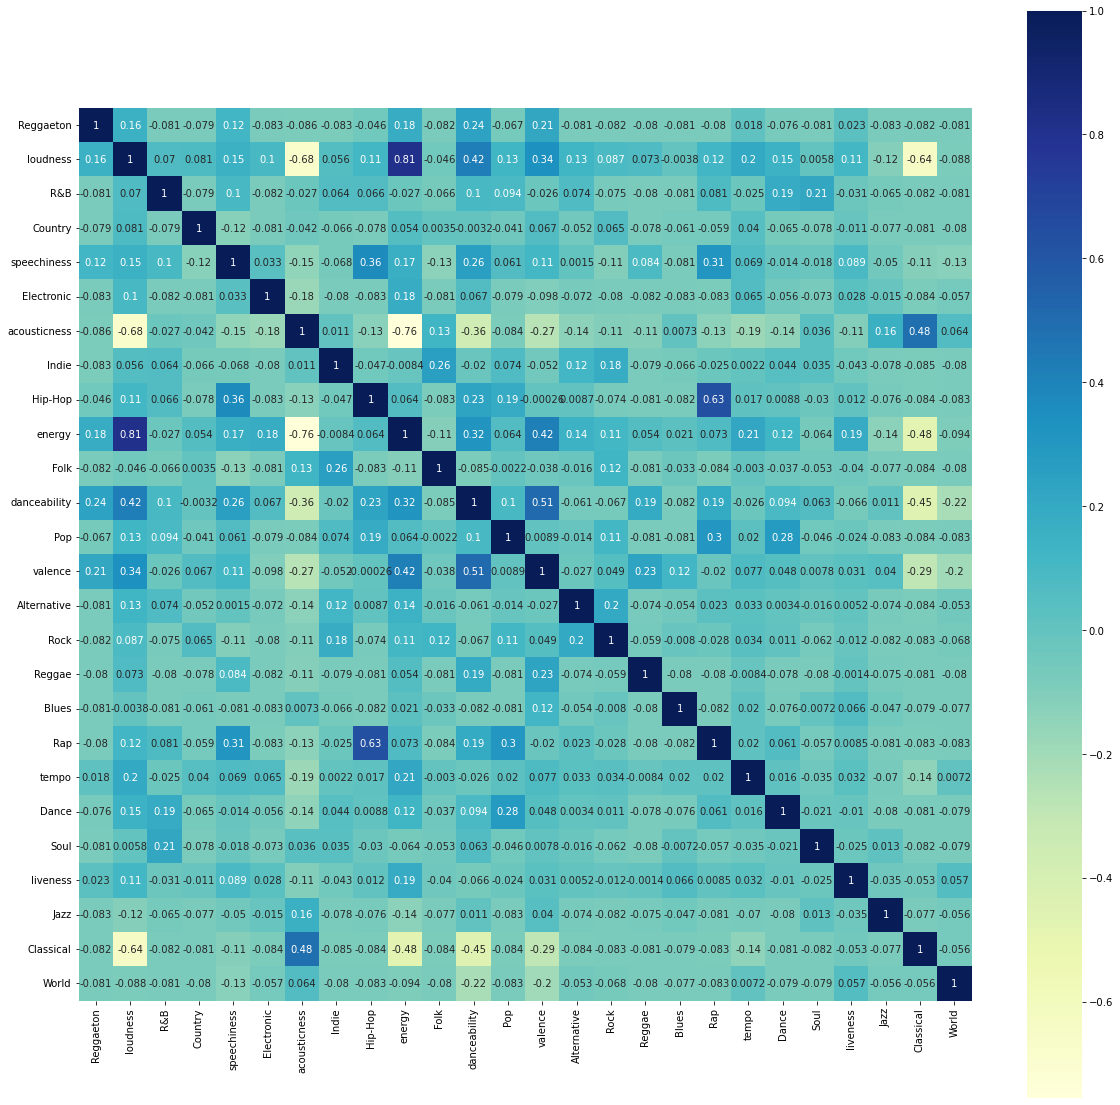

In [50]:
import seaborn as sns
# plot correlation matrix
corr = data_framex[list(set(data_framex.columns)-{'artist_name'})].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, vmax=1, square=True, annot=True, cmap="YlGnBu")
plt.show()

In [51]:
unique = data_frame['artist_name'].unique()

In [52]:
import torch
torch.autograd.set_detect_anomaly(True)
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import (
    Dataset,
    DataLoader,
)

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(unique)

In [53]:
y = []
for artists in df['artist_name'].values:
    y.append(label_encoder.transform(artists))
y = np.array(y, dtype=object)

In [80]:
import pickle
pickle.dump(y, open('y.pkl', 'wb'))

In [60]:
class CustomDataset(Dataset):
    def __init__ (self, dfx, artist_name):
        df = dfx.copy()
        del df['artist_name']
        X = df.values
        self.data = X.astype(np.float32)
        self.targets = artist_name
    
    def __len__(self):
        return len(self.data)
        
    def __getitem__(self, index):
        template = np.zeros(len(unique), dtype=np.float32)
        for i in self.targets[index]:
            template[i] = 1
        return torch.tensor(self.data[index]), torch.tensor(template)

ds = CustomDataset(data_framex, y)

In [62]:
ds.data.shape, ds.targets.shape, len(unique)

((120039, 26), (120039,), 12696)

In [63]:
from sklearn import model_selection
train_data_set, test_data_set = model_selection.train_test_split(
ds,
test_size = 20000,
shuffle = True
)

train_data_loader = DataLoader(
train_data_set,
batch_size = 16,
shuffle = True
)

test_data_loader = DataLoader(
test_data_set,
batch_size = 16,
shuffle = True
)

In [64]:
train_size = len(train_data_loader.dataset)
val_size = len(test_data_loader.dataset)
train_size, val_size

(100039, 20000)

In [73]:
import torch

class ClassificationModel(torch.nn.Module):
  def __init__(self):
    super(ClassificationModel, self).__init__()

    self.linear1 = torch.nn.Linear(ds[0][0].shape[0], 1024)
    self.relu1 = torch.nn.ReLU()
    self.linear_final = torch.nn.Linear(1024, len(unique))
    
  def forward(self, data):
    data = data.float()

    data = self.relu1(self.linear1(data))
    # data = self.relu2(self.linear2(data))
    # data = self.dropout(data)
    # data = self.relu3(self.linear3(data))
    data = self.linear_final(data)
    return data

In [74]:
import torch
import numpy as np

class EarlyStopping:
    def __init__(self, patience=7, verbose=True, delta=0, path='model.pth', trace_func=print):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model, 'artist__model.pth')
        self.val_loss_min = val_loss

In [75]:
import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ClassificationModel()
model.to(device)

criterion = torch.nn.CrossEntropyLoss()
# BCEWithLogitsLoss()

def calculate_correct_samples(predictions, targets):
    correct_samples = 0
    for prediction, target in zip(predictions, targets):
        true_indexes = np.where(target != 0)[0]
        predicted_indexes = prediction.argsort()[::-1][:len(true_indexes+1)][::-1]
        correct_samples += (predicted_indexes == true_indexes).sum()/len(true_indexes)
    return correct_samples

def fit(num_epochs, learning_rate, model, train_loader, val_loader):
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    train_losses = []
    valid_losses = []
    avg_train_losses = []
    avg_valid_losses = [] 

    early_stopping = EarlyStopping(patience=20, verbose=True)

    for epoch in range(num_epochs):
        losses = []
        correct = 0
        
        model.train()
        for (data, targets) in tqdm.tqdm(train_loader, desc= "Training"):
            data = data.to(device)
            targets = targets.to(device)
            
            optimizer.zero_grad()
            
            scores = model(data)
            
            loss = criterion(scores, targets)
            
            losses.append(loss.item())
            
            loss.backward()

            torch.nn.utils.clip_grad_value_(model.parameters(), 0.1)

            optimizer.step()
            
            correct += calculate_correct_samples(scores.cpu().detach().numpy(), targets.cpu().detach().numpy())
            train_losses.append(loss.item())
    
        
        model.eval()
        correct_ = 0
        for data, target in tqdm.tqdm(val_loader, desc= "Evaluation"):
          data = data.to(device)
          target = target.to(device)
          output = model(data)            
          loss = criterion(output, target)
          valid_losses.append(loss.item())
          correct_ += calculate_correct_samples(scores.cpu().detach().numpy(), targets.cpu().detach().numpy())
        
        accuracy = 100 * correct / train_size
        val_accuracy = 100 * correct_ / val_size

        train_loss = np.average(train_losses)
        valid_loss = np.average(valid_losses)
        avg_train_losses.append(train_loss)
        avg_valid_losses.append(valid_loss)
        
        print(f"{epoch+1} || valid_loss: {valid_loss} | train_loss: {train_loss} | accuracy: {accuracy} | val_accuracy: {val_accuracy}")
        
        early_stopping(valid_loss, model)
        
        if early_stopping.early_stop:
            print("Early stopping")
            break
        
        train_losses = []
        valid_losses = []

def check_accuracy(loader, model):
    print("Checking accuracy on test data")

    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for x, y in tqdm.tqdm(loader):
            x = x.to(device)
            y = y.to(device)

            scores = model(x)
            num_correct += calculate_correct_samples(scores.cpu().detach().numpy(), y.cpu().detach().numpy())
            num_samples += 1*x.shape[0]

        print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}")

    model.train()

In [ ]:
lr = 0.001
epochs = 1000
history1 = fit(epochs, lr, model, train_data_loader, test_data_loader)

In [ ]:
modelload = torch.load('artist__model.pth')
check_accuracy(test_data_loader, modelload)